#**Trabalho Prático 2** - Algoritmo de Dijkstra e Bellman-Ford



### **Created by:** Laysson Santos 800349 and Daniel De Souza Sobrinho Macedo 813524

## Implementação do algoritmo de heap minimo

In [2]:
import math
#implementação do heap minimo
class HeapMin:

    def __init__(self):
        self.nos = 0
        self.heap = []

    def add_no(self, u, indice):
        self.heap.append([u, indice])
        self.nos += 1
        f = self.nos
        while True:
            if f == 1:
                break
            p = f // 2
            if self.heap[p-1][0] <= self.heap[f-1][0]:
                break
            else:
                self.heap[p-1], self.heap[f-1] = self.heap[f-1], self.heap[p-1]
                f = p

    def remove_no(self):
        x = self.heap[0]
        self.heap[0] = self.heap[self.nos - 1]
        self.heap.pop()
        self.nos -= 1
        p = 1
        while True:
            f = 2 * p
            if f > self.nos:
                break
            if f + 1 <= self.nos:
                if self.heap[f][0] < self.heap[f-1][0]:
                    f += 1
            if self.heap[p-1][0] <= self.heap[f-1][0]:
                break
            else:
                self.heap[p-1], self.heap[f-1] = self.heap[f-1], self.heap[p-1]
                p = f
        return x

    def tamanho(self):
        return self.nos

## Implementação de um grafo com os algorimos de Dijkstra e Bellman-Ford

In [3]:
#implementação de um grafo
class Grafo:

    def __init__(self, vertices):
        self.vertices = vertices
        self.aresta = [[0] * self.vertices for i in range(self.vertices)]

    def add_aresta(self, u, v, peso, tipo): #adiciona arestas
        if tipo == 'd': #ve se é uma aresta direcionada ou não
            self.aresta[u-1][v-1] = peso
        else:
            self.aresta[u-1][v-1] = peso
            self.aresta[v-1][u-1] = peso

    def mostra_matriz(self): #imprime toda matriz adjacente
        print('A matriz de adjacências é:')
        for i in range(self.vertices):
            print(self.aresta[i])
        print('\n')

    def dijkstra(self, origem):
        custo_vem = [[-1, 0] for i in range(self.vertices)]#inicialização
        custo_vem[origem - 1] = [0, origem]
        h = HeapMin()  # Heap mínimo
        h.add_no(0, origem) # fila de prioridades
        while h.tamanho() > 0:
            dist, v = h.remove_no() # extrai vértice de menor λ(v)
            for i in range(self.vertices):
                if self.aresta[v-1][i] != 0: # relaxa toda aresta incidente a u
                    if custo_vem[i][0] == -1 or custo_vem[i][0] > dist + self.aresta[v-1][i]:
                        custo_vem[i] = [dist + self.aresta[v-1][i], v]
                        h.add_no(dist + self.aresta[v-1][i], i+1)
        return custo_vem

    def bellmanFord(self, origem):
        custo_vem = [[math.inf, None] for _ in range(self.vertices)]#inicialização
        custo_vem[origem - 1] = [0, origem]

        for _ in range(self.vertices - 1):
            for u in range(self.vertices):
                for v in range(self.vertices):
                    if self.aresta[u][v] != 0: # relaxa toda aresta incidente a u
                        if custo_vem[u][0] + self.aresta[u][v] < custo_vem[v][0]:
                            custo_vem[v] = [custo_vem[u][0] + self.aresta[u][v], u + 1]

        for u in range(self.vertices): #verifica se o grafo possui ciclo negativo
            for v in range(self.vertices):
                if self.aresta[u][v] != 0:
                    if custo_vem[u][0] + self.aresta[u][v] < custo_vem[v][0]:
                        print("O grafo contém um ciclo negativo")
                        return custo_vem

        return custo_vem

## Teste de Funcionalidade

O resultado dos algoritmos de Dijkstra e Bellman-Ford é representado por um vetor onde seus elementos são vetores de tamanho 2 que indicam o melhor caminho para o vertice i+1, ou seja, o vetor na possição 0 representa o resultado para o vertice 1 e assim por diante. O primeiro elemento do vetor de tamanho 2 é o custo minimo para chegar a vertice e o segundo elemente é o vertice antecessor.

Esse algotrimo cria um grafo não orientado e em seguida imprime sua matriz adjacente e o resultado do algoritmo de Dijkstra.

In [4]:
def teste_dijkstra():
    g = Grafo(6)

    g.add_aresta(1, 2, 18, 'n')
    g.add_aresta(1, 4, 15, 'n')
    g.add_aresta(2, 3, 9, 'n')
    g.add_aresta(2, 4, 2, 'n')
    g.add_aresta(3, 4, 14, 'n')
    g.add_aresta(3, 5, 10, 'n')
    g.add_aresta(3, 6, 28, 'n')
    g.add_aresta(4, 5, 7, 'n')
    g.add_aresta(5, 6, 36, 'n')

    g.mostra_matriz()

    resultado_dijkstra = g.dijkstra(1)
    print('Dijkstra: ', resultado_dijkstra)

if __name__ == "__main__":
    teste_dijkstra()

A matriz de adjacências é:
[0, 18, 0, 15, 0, 0]
[18, 0, 9, 2, 0, 0]
[0, 9, 0, 14, 10, 28]
[15, 2, 14, 0, 7, 0]
[0, 0, 10, 7, 0, 36]
[0, 0, 28, 0, 36, 0]


Dijkstra:  [[0, 1], [17, 4], [26, 2], [15, 1], [22, 4], [54, 3]]


Os vertices 1, 2, 3, 4, 5 e 6 seriam os vertices s, a, b, c, d e t respectivamente

***GRAFO:***

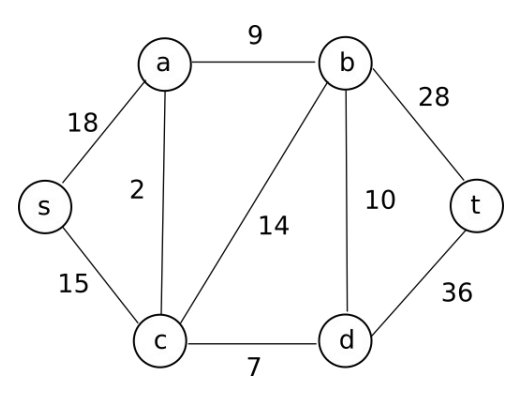

***RESULTADO:***

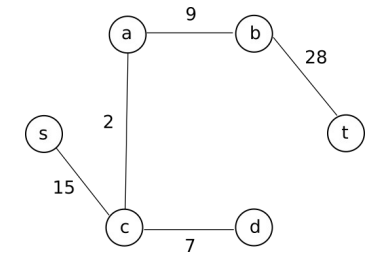

Esse algorimo cria um grafo orientado e imprime sua matriz adjacente e o resultado do algoritmo de Bellman-Ford

In [5]:
def teste_bellmanFord():
    g = Grafo(4)

    g.add_aresta(1, 2, 1, 'd')
    g.add_aresta(1, 3, 3, 'd')
    g.add_aresta(1, 4, 99, 'd')
    g.add_aresta(2, 3, 1, 'd')
    g.add_aresta(4, 2, -300, 'd')

    g.mostra_matriz()

    resultado_bellman_ford = g.bellmanFord(1)
    print('Bellman-Ford Resultado: ', resultado_bellman_ford)

if __name__ == "__main__":
    teste_bellmanFord()

A matriz de adjacências é:
[0, 1, 3, 99]
[0, 0, 1, 0]
[0, 0, 0, 0]
[0, -300, 0, 0]


Bellman-Ford Resultado:  [[0, 1], [-201, 4], [-200, 2], [99, 1]]


Os vertices 1,2,3 e 4 seriam os vertices a,b,c e d respectivamente


***GRAFO:***

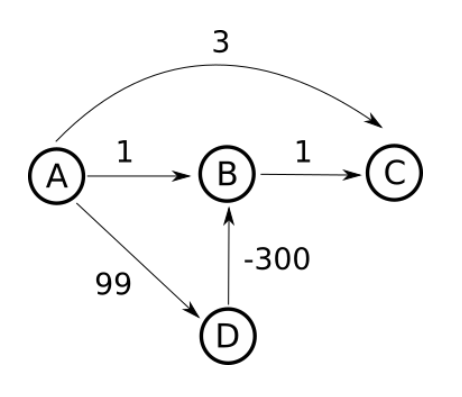

***RESULTADO:***



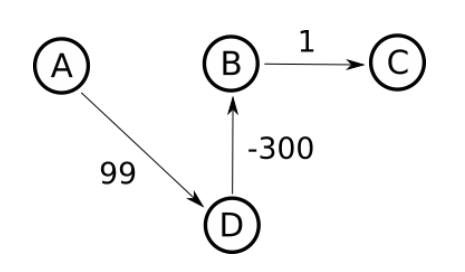